## Feature selection

特征选择指的是从一大组特征中选出最优的一组特征。特征选择有很多优点，并且也有很多方法可以做到这一点。

### Intro

特征选择或变量选择是指从数据集中的总特征中选择相关特征或变量子集，以构建机器学习算法的过程。

其优点在于：

    - 提高准确率
    - 简单的模型易于解释
    - 更短的训练时间
    - 通过降低过拟合提高泛化能力
    - 易实现
    - 在模型使用中减少数据错误的风险（无关或嘈杂的特征可能会引入模型预测的错误）
    - 处理冗余变量（消除贡献不大特征，避免不必要的计算）
    - 避免在高维空间中出现不良学习行为（在高维空间中，特征数量较大，模型可能受到维度灾难的影响。特征选择有助于专注于最有信息的特征，防止不良学习行为，提高了模型的整体性能。）

方法：
    特征选择的技术主要分为三类：过滤方法（filter methods），包装方法（wrapper methods）和嵌入方法（embedded methods）：

    1. 过滤方法 filter methods
        - 基本方法      basic methods
        - 单变量方法    univariate methods
        - 信息增益      information gain
        - Fischer score（F统计量）
        - 相关矩阵热力图 correlation matrix with heatmap
    
    2. 封装方法 wrapper method
        - 前向选择      forward selection
        - 后向选择      backward elimination
        - 穷举特征选择  exhaustive feature selection
        - 递归特征消除  recursive feature elimination
        - 带交叉验证的递归特征消除 recursive feature elimination with CV
    
    3. 嵌入方法 embedded methods
        - Lasso
        - Ridge
        - 树重要性 tree importance

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1. 过滤方法

过滤方法通常用作预处理步骤，在这个过程中，特征的选择和任何机器学习算法无关。相反，特征选择的依据是他们在各种统计测试中与预测变量的相关性进行划分的。这些方法的特点如下：

    - 依赖于特征的特性 characteristics
    - 不使用机器学习算法
    - 与模型无关
    - 计算成本低
    - 预测性能通常低于包装法
    - 非常适合快速筛选和去除无关特征

过滤方法包括了以下几种技术：

    - 基本方法              Basic methods
    - 单变量特征选择        Univariate feature selection
    - 信息增益              Information gain
    - 费舍尔分数            Fischer score
    - 特征选择的方差分析F值  ANOVA F-Value for Feature Selection
    - 相关矩阵热力图        Correlation Matrix with Heatmap

过滤方法的步骤一般是：

全部特征的集合 - 选择最好的自己 - 训练算法 - 性能评估

### 1.1 基本方法 Basic Methods

基本方法中，我们要去除常量和准常量特征 
remove constant and quasi-constant features

#### 1.1.1 去除常数特征 Remove constant features

常数特征指的是在数据集中所有样本的此特征值都相同（只有一个值）的特征。这样的特征不提供任何信息，无法让机器学习模型区分或者预测目标。

识别和移除常量特征，是实现特征选择和更易于解释的机器学习模型的第一步。要识别常量特征，我们可以使用sklearn中的Variance Threshould函数。

接下来使用Santander客户满意度数据来演示如何识别常量特征。

In [3]:
X_train = pd.read_csv('s_train.csv', nrows = 35000)
X_test = pd.read_csv('s_test.csv', nrows = 15000)

X_train.drop(['TARGET'], axis = 1, inplace = True)

X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,69974,2,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98642.430000
34996,69976,2,65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128930.100000
34997,69977,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
34998,69981,2,28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114747.060000


In [4]:
X_test

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,29822,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
14996,29824,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141868.410000
14997,29825,2,53,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55323.540000
14998,29827,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65211.420000


#### 重要！！

在所有的特征选择过程中，仅通过检查训练集来选择特征是一种好的做法，这样是为了避免过度拟合。（例如防止不小心让训练集知道了测试集的信息）。

In [5]:
# sklearn 的方差阈值是一种简单的特征选择基准方法。它会删除方差不符合
# 某个阈值的所有特征。默认情况下，它会删除所有零方差特征，即在所有样
# 本中具有相同值的特征。

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold= 0)
sel.fit(X_train) # 此fit会找到方差为0的特征

# .get_support会返回布尔类型向量，表明那些特征是在经过筛选后被保留的

# 这样能够得到非常数特征的数量

len(X_train.columns[sel.get_support()])

319

能看到有 370 - 319 = 51个变量都是常数变量。我们接下来用transform方法来减少训练集和测试集的特征数量。

In [6]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape

(35000, 319)

In [7]:
X_test.shape

(15000, 319)

通过去除常数特征，我们极大的缩小了特征空间！

#### 1.1.2 去除准常数特征 remove quasi-constant features

准常数特征值的是在数据集中的绝大多数样本中都显示相同值的特征。一般来说，这些特征提供的信息很少，甚至无法让机器学习模型区分或者预测目标。但也有例外。因此，在移除这类特征时，我们应该小心谨慎。

为了去除准常数特征，我们还是使用sklearn中的VarianceThreshold。

In [8]:
X_train = pd.read_csv('s_train.csv', nrows = 35000)
X_test = pd.read_csv('s_test.csv', nrows = 15000)

X_train.drop(['TARGET'], axis = 1, inplace = True)

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [9]:
# 这一行创建了一个VarianceThreshold类的实例。threshold参数设置为0.01，这意味着方差小于0.01的特征（列）将被移除。换句话说，此阈值用于过滤
# 掉方差较低的特征。

sel = VarianceThreshold(threshold = 0.01)

sel.fit(X_train)

len(X_train.columns[sel.get_support()])

263

能看到有 370 - 263 = 107个变量都是准常数变量。这意味着着107个变量在99%的训练集样本中都是同一个值，可以说这个特征几乎就是常数特征。

In [10]:
# 举个例子

X_train['ind_var31'].value_counts() / np.float32(len(X_train))

ind_var31
0    0.996286
1    0.003714
Name: count, dtype: float64

我们接下来用transform方法来减少训练集和测试集的特征数量。

In [11]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 263), (15000, 263))

综上，在此例中，仅仅是使用基本方法去除掉（准）常数特征，就有可能删除掉超过100个特征，这对减少模型复杂度相当有用。

### 1.2 单变量选择方法 Univariate selection methods 

单变量特征选择方法的原理是根据单变量统计检验（比如ANOVA，即方差分析）选择最佳特征，是预处理中的一步。基于F-test的检验方法可以估计两个随机变量之间的线性依赖程度，它假设特征与目标之间存在线性关系，还假设变量遵循高斯分布。

主要讨论两种这一类别的方法：
- SelectKBest
- SelectPercentile

以上两种在实践中最常用

#### 1.2.1 SelectKBest

这种方法根据K个最高分来选择特征。

例如我们可以对样本进行卡方检验，从鸢尾花数据集中选出两个最佳特征：

（卡方检验（Chi-squared test）是一种用于统计学中分类数据的假设检验方法。它可以用于比较观察到的分类数据分布与期望的理论分布之间的差异，从而评估两个分类变量之间是否存在关联。常用于分析分类数据的关联性，例如，检验两个分类变量之间是否存在显著的关联，或者用于检验观察数据与期望数据的拟合程度。）

In [12]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

X,y = load_iris(return_X_y = True)

X.shape

(150, 4)

In [13]:
X_new = SelectKBest(chi2, k = 2).fit_transform(X, y)

X_new.shape

(150, 2)

由此我们选出了两个最好的特征子集。

#### 1.2.2 SelectPercentile

根据最高百分位数选择特征

In [14]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2

X, y = load_digits(return_X_y = True)

X.shape

(1797, 64)

In [15]:
X_new = SelectPercentile(chi2, percentile = 10).fit_transform(X, y)

X_new.shape

(1797, 7)

两者的区别在于，Kbest需要指定选择具体多少个特征，而Percentile是指定选择前多少百分比的特征。

下面列举了一些常用的 score_func 函数以及它们的应用场景：

- 回归问题（Regression）：

    - f_regression：  使用方差分析（ANOVA）的 F 统计量。适用于回归问题，衡量每个特征与目标变量之间的线性关系。

- 分类问题（Classification）：

    - f_classif：     同样使用ANOVA的 F 统计量，适用于分类问题。
    - chi2：          卡方检验，适用于分类问题，尤其是对于离散的类别变量。

- 互信息（Mutual Information 互信息的值越大，表示两个随机变量之间的关联程度越高。当互信息为零时，表示两个变量是相互独立的。）：

    - mutual_info_regression：    适用于回归问题的互信息，衡量变量之间的非线性关系。
    - mutual_info_classif：       适用于分类问题的互信息。

- 其他得分函数：

f_classif、f_regression、chi2 的百分位数（percentile）版本： 除了上述提到的具体函数外，还可以使用它们的百分位数版本，例如 f_classif_percentile、f_regression_percentile、chi2_percentile。这些版本会选择得分排名在前一定百分比的特征。

##### 在选择适当的 score_func 时，主要考虑以下因素：

- 问题类型：      选择与问题类型（分类或回归）相符的评分函数。
- 特征之间关系：  考虑特征之间的关系是线性还是非线性，选择合适的评分函数。
- 领域知识：      领域专业知识可以帮助选择更适合问题的评分函数。

#### 注意！！

这些特征选择对象‘将评分函数作为输入’，‘返回单变量得分和p值’（对于SelectKBest和SelectPercentile则只返回得分）。

- 对于回归任务：f_regression、mutual_info_regression
- 用于分类任务：chi2、f_classif、mutual_info_classif


基于 F 检验的方法可以估算‘两个随机变量之间的线性相关程度’。

另一方面，互信息方法可以‘捕捉任何类型的统计依赖性’，但由于是非参数方法，它们需要更多样本才能进行准确估计。

#### 使用稀疏数据进行特征选择

稀疏数据是指数据中大多数元素都是零（或者是一个固定的占位符），而非零元素仅占据数据集的一小部分。相对而言，密集数据则包含大量非零元素。

在稀疏数据中，许多条目的值为零，因此与密集数据相比，存储和处理稀疏数据可以节省大量内存空间。这对于处理大规模数据集，特别是在机器学习和数据挖掘中，具有重要意义。

常见的例子包括：

- 自然语言处理（NLP）： 在文本数据中，词汇表非常庞大，但每个文档中仅包含少数词汇，导致文档-词汇矩阵是稀疏的。
- 推荐系统： 用户和物品之间的交互矩阵通常是稀疏的，因为用户只与少数物品产生交互。
- 基因组学： 基因表达矩阵中很多基因在特定条件下可能没有表达，导致矩阵的稀疏性。

如果使用稀疏数据（即以稀疏矩阵表示的数据），chi2、mutual_info_regression、mutual_info_classif 将在不增加数据密度的情况下处理数据。

#### 警告！！

注意不要在分类问题中使用回归评分函数，否则会得到无用的结果。

### 1.3 信息增益 Information Gain

信息增益或互信息增益衡量了特征的的存在与否对正确预测目标的贡献程度。

互信息增益 Mutual Information 衡量的是X和Y共享的信息：它衡量了解其中一个变量在多大程度上减少另一个变量的不确定性：

- 如果X和Y是独立的，那么了解X就不会得到任何关于Y的信息，反之亦然，于是特们彼此之间的互信息为0
- 另一个极端，也就是X和Y彼此是对方的确定性函数，那么X传递的所有信息都与Y彼此共享，它们的熵是相同的

两种类型的信息增益：

- mutual_info_classif

估算离散目标变量之间的互信息。两个随机变量之间的互信息（MI）是一个非负值，用来衡量变量之间的依赖关系。

  - 当两个随即变量彼此之间完全独立，MI等于0
  - MI越大，说明两者之间的依赖性越强

- mutual_info_regression

同上（依赖于KNN）

### 1.4 相关性矩阵热力图 Correlation-Matrix with Heatmap

相关性是衡量两个或者多个变量之间线性关系的一种方法。

好的变量和目标变量高度相关，彼此之间相关的特征会对预测提供多余的信息。最好的情况下，变量应该都与目标变量高度相关，但彼此之间不相关。

好的特征子集包含于目标高度相关但彼此之间不相关的特征。

- 相关性为0，彼此完全独立
- 大于0，意味着增加一个特征的值会增加另一个特征的值
- 小于0，反之

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns = iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

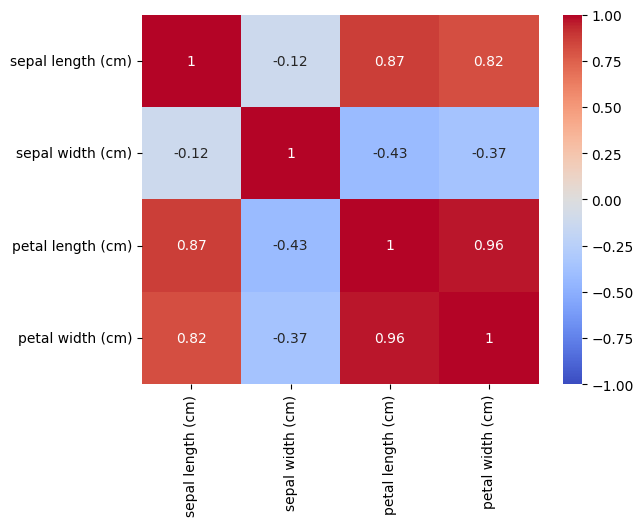

In [17]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

这行代码涉及到几个步骤，主要是用于生成一个上三角矩阵，用于过滤相关性矩阵（corr_matrix）中的重复和对称信息。让我逐步解释：

- np.ones(corr_matrix.shape)：

这个部分创建一个和 corr_matrix 具有相同形状的矩阵，其中所有元素的值都是1。这个矩阵的目的是作为一个掩码。

- np.triu(..., k=1)：

triu 表示 "upper triangular"，它将矩阵的下三角部分变为零，只保留上三角部分。通过设置 k=1，我们确保保留了对角线以上的元素，而对角线以下的元素被设为零。

- .astype(np.bool_)：

将矩阵中的元素类型转换为布尔型，即 True 或 False。由于 triu 操作之后的矩阵中非零元素的位置都是 True，而零元素的位置是 False。

- corr_matrix.where(...)：

使用 where 方法，将 corr_matrix 中的元素与前述步骤生成的布尔型矩阵进行比较。在与 True 对应的位置保留原始 corr_matrix 中的值，而在与 False 对应的位置设为 NaN（Not a Number）。

最终，通过上述步骤，upper 变量将包含 corr_matrix 的上三角部分，并且对角线以下的元素都是 NaN。这是因为在相关性矩阵中，对角线以下的信息是对称的，而上三角部分包含了所有唯一的相关性值。这通常用于避免重复计算相关性。

In [18]:
# 首先得到上三角相关性矩阵
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool_))

upper

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),NaN,-0.11757,0.871754,0.817941
sepal width (cm),NaN,NaN,-0.428440,-0.366126
petal length (cm),NaN,NaN,NaN,0.962865
petal width (cm),NaN,NaN,NaN,NaN


In [19]:
# 删除任何列相关性大于0.9得特征
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.9)]

print(to_drop)

['petal width (cm)']


In [20]:
# 删除对应列

df1 = df.drop(df[to_drop], axis = 1)

df1

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


## 2. 封装方法 Wrapper Methods

封装方法中，我们尝试使用特征的一些子集并使用它们来训练模型。根据之前模型中得出的结论，我们决定向自己中添加或移除特征。该问题基本上被简化为一个搜索问题，这些方法通常计算成本很高。

封装方法的一些例子：

- 正向选择（Forward selection）
- 向后消除（Backward elimination）
- 全特征搜索（Exhaustive feature selection）
- 递归特征消除（Recursive feature elimination）
- 交叉验证的递归特征消除（Recursive feature elimination with cross-validation）

### 2.1 正向选择

正向选择是一种迭代方法，一开始的时候我们的模型中不包含任何特征。每次迭代中，我们不断添加能够改善我们模型的特征，直到添加新特征不再能够提高模型的性能。

此过程始于一个空的特征集，最佳原始特征被确定并添加到另一个逐渐减少的集合中。每个后续迭代中，将剩余原始特征中最佳的一个添加到模型所使用的特征集合中。

正向选择的步骤从评估所有特征的独立性开始，选择根据预设的评估标准生成最佳性能算法的那一个特征。然后，它评估所选特征与第二个特征的所有可能的组合，并根据相同预设标准生成最佳性能算法的特征对。

预设的标准可以是用于分类的roc_auc或者用于回归的r squared等

这个选择的过程是‘贪婪’的，因为他评估所有可能的单一，双重，三重等等的特征组合。因此，他在计算上相当昂贵，当特征空间很大的时候有时是不可行的。

对于实现这种类型的特征选择，python有一个专用的包 mlxtend

再 mlxtend 实现的逐步向前特征选择中，停止的标准是任意设置的特征数量，当达到所需数量的选择特征时，搜索将结束。

首先在 house price 中使用 mlxtend 的 StepForward 特征选择算法

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [22]:
data = pd.read_csv('h_train.csv')

data.shape

(1460, 81)

In [23]:
# 暂时为了解释只选择连续型特征

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include = numerics).columns)
data = data[numerical_vars]

data.shape

(1460, 38)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SalePrice'], axis = 1),
    data['SalePrice'],
    test_size = 0.3,
    random_state = 0
)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [33]:
corr_matrix = data.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool_))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8)]

to_drop

# data = data.drop(df[to_drop], axis = 1)

# data

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [28]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)

corr_features

{'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

<AxesSubplot:>

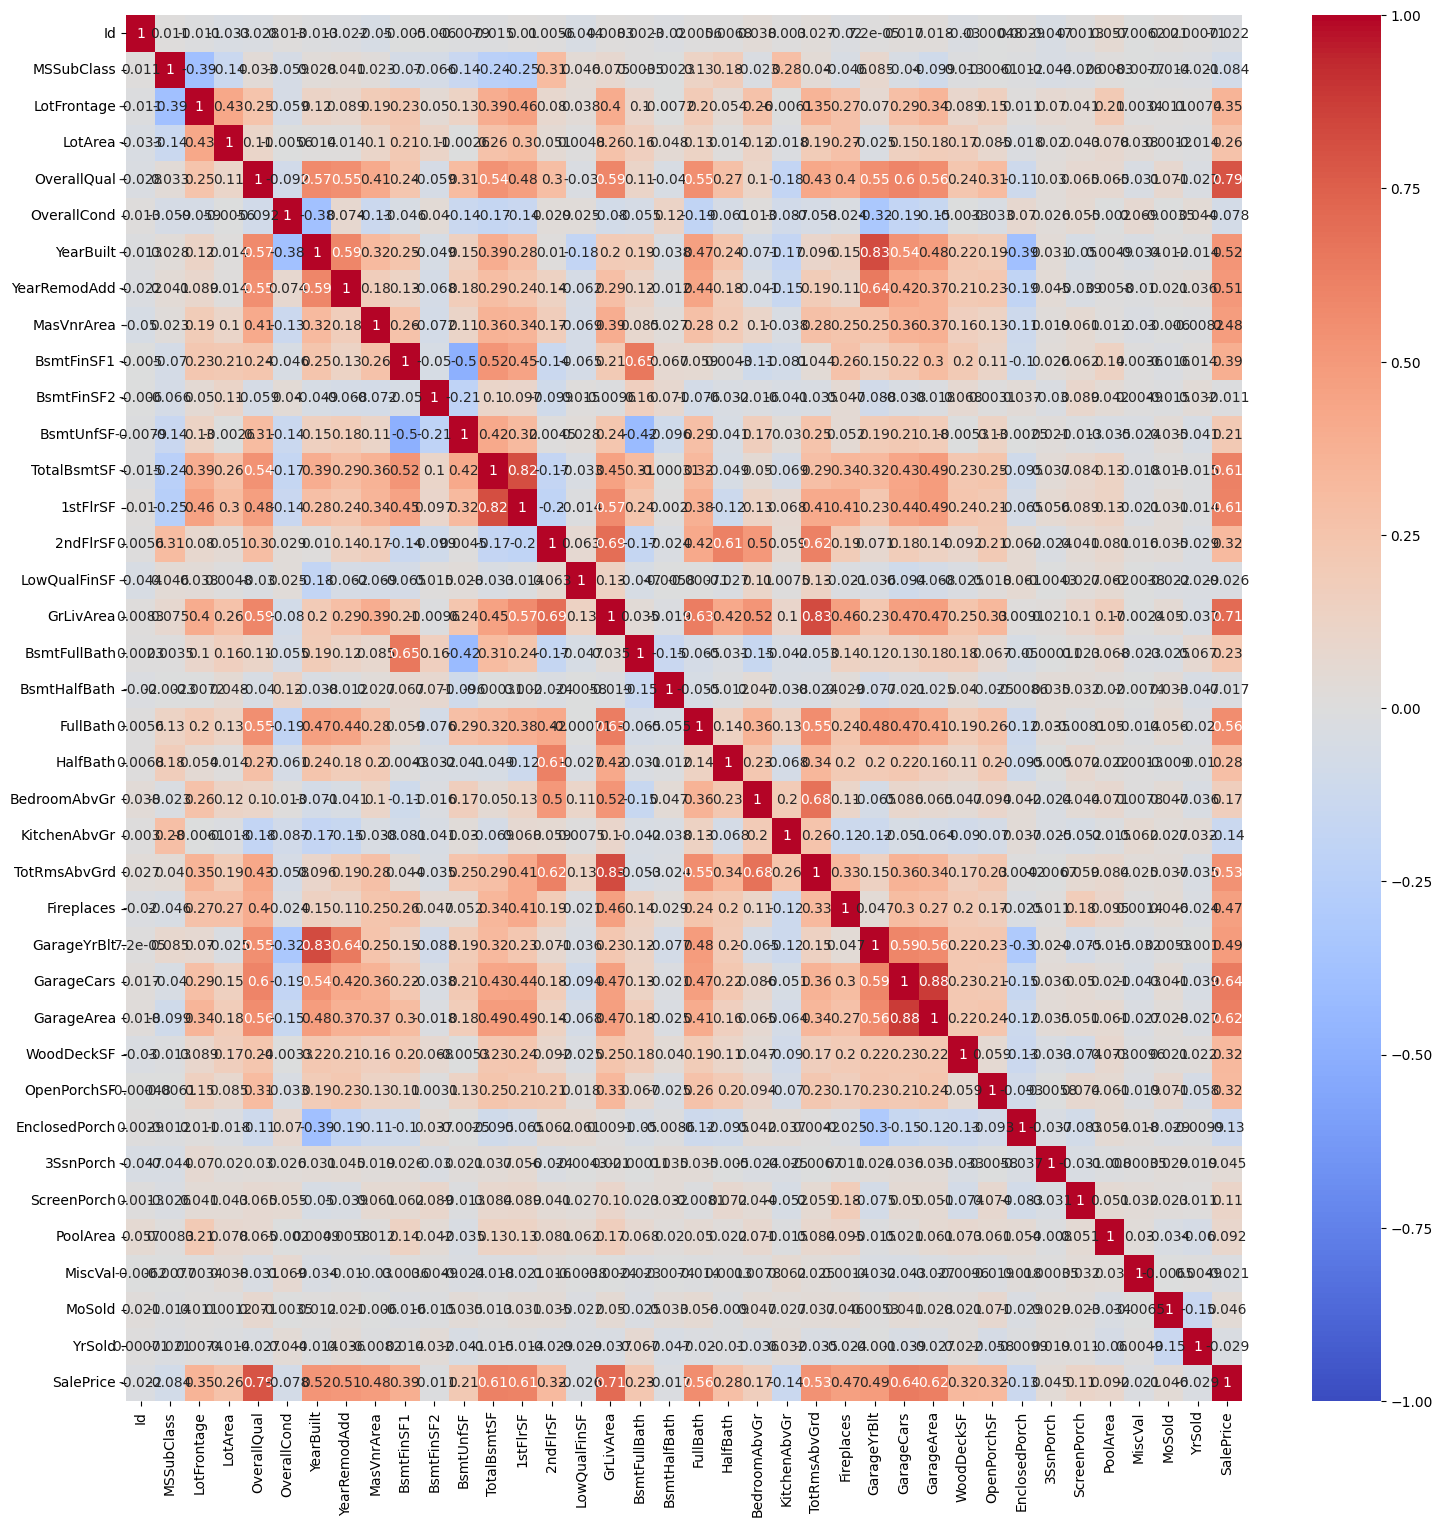

In [36]:
fig = plt.figure(figsize = (18, 18))

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, vmax = 1, vmin = -1)

In [37]:
# 删除高度相关的特征

X_train.drop(to_drop, axis = 1, inplace = True)
X_test.drop(to_drop, axis = 1, inplace = True)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 64 to 684
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1022 non-null   int64  
 1   MSSubClass     1022 non-null   int64  
 2   LotFrontage    833 non-null    float64
 3   LotArea        1022 non-null   int64  
 4   OverallQual    1022 non-null   int64  
 5   OverallCond    1022 non-null   int64  
 6   YearBuilt      1022 non-null   int64  
 7   YearRemodAdd   1022 non-null   int64  
 8   MasVnrArea     1017 non-null   float64
 9   BsmtFinSF1     1022 non-null   int64  
 10  BsmtFinSF2     1022 non-null   int64  
 11  BsmtUnfSF      1022 non-null   int64  
 12  TotalBsmtSF    1022 non-null   int64  
 13  2ndFlrSF       1022 non-null   int64  
 14  LowQualFinSF   1022 non-null   int64  
 15  GrLivArea      1022 non-null   int64  
 16  BsmtFullBath   1022 non-null   int64  
 17  BsmtHalfBath   1022 non-null   int64  
 18  FullBath     

In [41]:
X_train.fillna(0, inplace = True)

In [42]:
# 前向特征选择

sfs1 = SFS(RandomForestRegressor(),
           k_features = 10,
           forward = True,
           floating = False,
           verbose = 2,
           scoring = 'r2',
           cv = 3)

sfs1 = sfs1.fit(np.array(X_train), y_train)


[2023-12-06 19:13:45] Features: 1/10 -- score: 0.668173399373147
[2023-12-06 19:14:31] Features: 2/10 -- score: 0.7228856973482335
[2023-12-06 19:15:20] Features: 3/10 -- score: 0.7474660717419189
[2023-12-06 19:16:08] Features: 4/10 -- score: 0.7654943931746215
[2023-12-06 19:17:02] Features: 5/10 -- score: 0.7690653329623286
[2023-12-06 19:18:25] Features: 6/10 -- score: 0.777133787523916
[2023-12-06 19:20:06] Features: 7/10 -- score: 0.8219725085849853
[2023-12-06 19:22:19] Features: 8/10 -- score: 0.8386020178758037
[2023-12-06 19:24:45] Features: 9/10 -- score: 0.8507349719499974
[2023-12-06 19:27:10] Features: 10/10 -- score: 0.8551038718897268

In [43]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

### 2.2 反向消除

在反向消除中，我们从所有的特征开始，在每次迭代中，我们移除最不显著的特征以提高模型的性能。我们重复这个过程，直到一处特征无法在带来明显的性能改善。

该过程从完整的数据集开始。每一步中，他会移除集合中剩余的最差属性。

In [44]:
sfs1 = SFS(RandomForestRegressor(),
           k_features = 10,
           forward = False,
           floating = False,
           verbose = 2,
           scoring = 'r2',
           cv = 3)

sfs1 = sfs1.fit(np.array(X_train), y_train)


[2023-12-06 19:35:55] Features: 32/10 -- score: 0.8588475848125342
[2023-12-06 19:44:40] Features: 31/10 -- score: 0.8609796011609001
[2023-12-06 19:52:12] Features: 30/10 -- score: 0.8628383610990046
STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

### 2.3 全特征穷举选择

在全特征穷举选择中，算法通过优化某个指定的性能度量值，选择了对于某个特定的机器学习算法来说所有可能的特征子集中的最佳子集。

举个例子：如果分类器是逻辑回归，数据集一共包含4各特征，那么算法将评估所有15种可能的特征组合，并选择能够使得逻辑回归分类器得到最佳性能的那个特征组合。

注意！这种行为在计算上非常的昂贵，有时候如果特征空间很大，几乎不可能使用这种方法。

这个方法同样在mlxtend中实现。使用此算法时，停止标准是一个任意设定的的特征数量，当达到所需的特征数量时，搜索将结束。

### 2.4 特征递归消除

递归特征消除是一种贪婪优化算法，目的同样是找到最佳的特征子集。它反复创建模型，并在每次迭代中保留性能最佳或最差的特征子集。它利用剩余的特征构建下一个模型，直到所有的特征都备用金。然后，它根据他们被消除的顺序对特征进行排名。

递归特征消除通过贪婪搜索来寻找性能最佳的特征子集。它迭代地创建模型，并在每次迭代中确定性能最佳或最差的特征。它利用剩余的特征构建后续模型，直到所有特征都被探索。然后，它根据它们被消除的顺序对特征进行排名。在最坏的情况下，如果数据集包含N个特征，递归特征消除将对2N个特征组合进行贪婪搜索。


### 2.5 带交叉验证的特征递归消除

具有交叉验证的递归特征消除（RFECV）特征选择技术通过使用递归特征消除迭代地移除0到N个特征，为估计器选择最佳特征子集。

然后，它基于模型的准确性、交叉验证分数或roc-auc选择最佳特征子集。递归特征消除技术通过多次拟合模型，在每个步骤中移除最弱的特征，从而消除了n个特征。


## 3. 嵌入方法 Embedded Methods

嵌入方法是迭代的，因为它关心模型训练过程的每一次迭代，并精心提取那些对特定迭代的训练贡献最大的特征。正则化方法是最常用的嵌入方法，它对给定系数阈值的特征进行惩罚。

这就是为什么正则化方法也被称为惩罚方法，它们在预测算法（如回归算法）的优化中引入了额外的约束，使模型偏向于更低复杂性（较少的系数）。

其中一些最流行的例子是LASSO和岭回归，它们具有内置的惩罚函数以减少过拟合。

### 3.1 LASSO回归

Lasso回归执行L1正则化，其添加的惩罚等于系数的幅度的绝对值。

正则化包括对机器学习模型的不同参数添加惩罚，以降低模型的自由度，换句话说，防止过拟合。在线性模型正则化中，对乘以每个预测变量的系数应用惩罚。在不同类型的正则化中，Lasso或l1正则化具有将某些系数收缩至零的特性。因此，该特征可以从模型中移除。

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [46]:
data = pd.read_csv('h_train.csv')

data.shape

(1460, 81)

In [47]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]

data.shape

(1460, 38)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis = 1),
    data['SalePrice'],
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [50]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

sel = SelectFromModel(Lasso(alpha = 100))
sel.fit(scaler.transform(X_train.fillna(0)), y_train)

selected_feat = X_train.columns[(sel.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel.estimator_.coef_ == 0)))

total features: 37
selected features: 33
features with coefficients shrank to zero: 4


可以看到Lasso正则化帮助移除了数据集中不重要的特征，增大惩罚系数能偶增加被移除的特征数量。因此，我们需要注意不要让惩罚变得太大，不然可能会把重要的特征也移除了，或者设置的太小，会无法删除不重要的特征。

如果要是删除了重要的特征，我们能够观察到性能的骤减，此时我们需要减轻正则化的力度。

### 3.2 Random Forest 特征重要性

随机森林相当流行的原因是他们通常能够提供良好的预测性能，低过拟合和易于解释性。这种可解释性是因为推导出每个变量对数的决策的重要性非常的直观。换句话说，可以轻松计算每个变量对决策的贡献。

接下来用蘑菇数据集进行演示：

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

'''

Attribute Information: (classes: edible=e, poisonous=p)
属性信息：（类别：可食用=e，有毒=p）

cap-shape（菌盖形状）: 
bell（钟形）=b, conical（圆锥形）=c, convex（凸形）=x, flat（平坦）=f, knobbed（带有小球状突起）=k, sunken（凹陷）=s

cap-surface（菌盖表面）: 
fibrous（纤维状）=f, grooves（有沟槽）=g, scaly（鳞状）=y, smooth（光滑）=s

cap-color（菌盖颜色）: 
brown（棕色）=n, buff（浅黄色）=b, cinnamon（肉桂色）=c, gray（灰色）=g, green（绿色）=r, pink（粉色）=p, purple（紫色）=u, red（红色）=e, white（白色）=w, yellow（黄色）=y

bruises（瘀伤）: 
bruises（有瘀伤）=t, no（没有瘀伤）=f

odor（气味）: 
almond（杏仁味）=a, anise（茴香味）=l, creosote（煤焦油味）=c, fishy（鱼腥味）=y, foul（难闻的）=f, musty（霉味）=m, none（没有气味）=n, pungent（刺激性味道）=p, spicy（辛辣味）=s

gill-attachment（褶附着）: 
attached（附着）=a, descending（下垂）=d, free（自由）=f, notched（缺口）=n

gill-spacing（褶间距）: 
close（紧密）=c, crowded（拥挤）=w, distant（远离）=d

gill-size（褶大小）: 
broad（宽阔）=b, narrow（狭窄）=n

gill-color（褶颜色）: 
black（黑色）=k, brown（棕色）=n, buff（浅黄色）=b, chocolate（巧克力色）=h, gray（灰色）=g, green（绿色）=r, orange（橙色）=o, pink（粉色）=p, purple（紫色）=u, red（红色）=e, white（白色）=w, yellow（黄色）=y

stalk-shape（柄形状）: 
enlarging（扩大）=e, tapering（变细）=t

stalk-root（柄根）: 
bulbous（球根）=b, club（短而厚）=c, cup（杯状）=u, equal（相等）=e, rhizomorphs（根状体）=z, rooted（有根）=r, missing（缺失）=?

stalk-surface-above-ring（环上柄表面）: 
fibrous（纤维状）=f, scaly（鳞状）=y, silky（丝状）=k, smooth（光滑）=s

stalk-surface-below-ring（环下柄表面）: 
fibrous（纤维状）=f, scaly（鳞状）=y, silky（丝状）=k, smooth（光滑）=s

stalk-color-above-ring（环上柄颜色）: 
brown（棕色）=n, buff（浅黄色）=b, cinnamon（肉桂色）=c, gray（灰色）=g, orange（橙色）=o, pink（粉色）=p, red（红色）=e, white（白色）=w, yellow（黄色）=y

stalk-color-below-ring（环下柄颜色）: 
brown（棕色）=n, buff（浅黄色）=b, cinnamon（肉桂色）=c, gray（灰色）=g, orange（橙色）=o, pink（粉色）=p, red（红色）=e, white（白色）=w, yellow（黄色）=y

veil-type（蒙皮类型）: 
partial（部分）=p, universal（整体）=u

veil-color（蒙皮颜色）: 
brown（棕色）=n, orange（橙色）=o, white（白色）=w, yellow（黄色）=y

ring-number（环数量）: 
none（没有）=n, one（一个）=o, two（两个）=t

ring-type（环类型）: 
cobwebby（网状）=c, evanescent（瞬间消失的）=e, flaring（张开的）=f, large（大型）=l, none（没有）=n, pendant（垂下的）=p, sheathing（包覆的）=s, zone（带状）=z

spore-print-color（孢子印颜色）: 
black（黑色）=k, brown（棕色）=n, buff（浅黄色）=b, chocolate（巧克力色）=h, green（绿色）=r, orange（橙色）=o, purple（紫色）=u, white（白色）=w, yellow（黄色）=y

population（种群）: 
abundant（丰富）=a, clustered（聚集）=c, numerous（众多）=n, scattered（分散）=s, several（几个）=v, solitary（孤独）=y

habitat（生长环境）: 
grasses（草地）=g, leaves（叶子）=l, meadows（草地）=m, paths（小路）

'''

<AxesSubplot:>

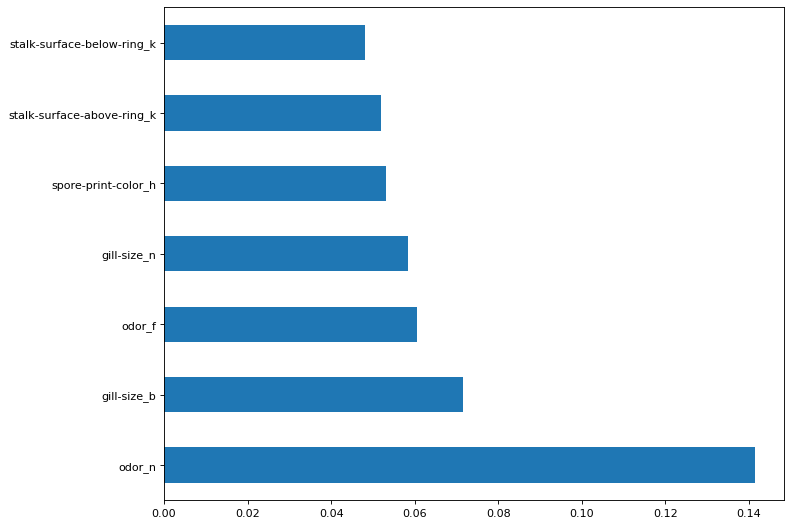

In [56]:
df = pd.read_csv('mushrooms.csv')

X = pd.get_dummies(df, 
                    columns = df.drop(['class'], axis = 1).columns,
                    prefix = df.drop(['class'], axis = 1).columns)
X = X.drop(['class'], axis = 1)

y = df['class']
y = LabelEncoder().fit_transform(y)

X2 = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

## 4. 如何选择最合适的特征选择方法

- 数值输入，分类输出

对应用数值进行预测的回归任务，最常用的是相关系数法

- 数值输入，分类输出

最常用的方法还是相关性矩阵，但还可以使用ANOVA coefficient

- 分类输入，数值输出

- 分类输入，分类输出

常用的方法是卡方检验，也可以使用互信息